<a href="https://colab.research.google.com/github/jamg-upv/CAHOS19/blob/main/python/modelo1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PUESTA A PUNTO DE LOS DATOS**#

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

direccion0='https://raw.githubusercontent.com/jamg-upv/CAHOS19/main/inputtables/dataset1fake1.csv'
df=pd.read_csv(direccion0, delimiter=';')

df['parasumar']=1 #esta columna se usará para hacer los recuentos totales del dataset2

#Ordenamos según sexo y edad
df1= df.sort_values(['edad','sexo'])

**Hacemos lo mismo que en el tratamientoDATASET1fake y hacemos recuento total por edad y sexo para cada fecha cuantos ingresos al hosp o a uci, cuantas altas, cuantas defunc, etc.**

In [2]:
#Eliminamos las columnas que no nos sirven para cada suma
ingresoshosp=df.drop(['Id', 'CNH', 'fechaingreuci', 'fechaaltauci', 'fechaaltahosp', 'fechadefunc', 'fechatraslado', 'altadeftraslado','ComorbidityIndex'], axis=1)
ingresosuci=df.drop(['Id', 'CNH' ,'fechaingrehosp', 'fechaaltauci','fechaaltahosp', 'fechadefunc', 'fechatraslado', 'altadeftraslado','ComorbidityIndex'], axis=1)
altasuci=df.drop(['Id', 'CNH','fechaingrehosp', 'fechaingreuci','fechaaltahosp', 'fechadefunc', 'fechatraslado', 'altadeftraslado','ComorbidityIndex'], axis=1)
altashosp=df.drop(['Id', 'CNH','fechaingrehosp', 'fechaingreuci','fechaaltauci', 'fechadefunc', 'fechatraslado', 'altadeftraslado','ComorbidityIndex'], axis=1)
defunc=df.drop(['Id', 'CNH','fechaingrehosp', 'fechaingreuci','fechaaltauci', 'fechaaltahosp', 'fechatraslado', 'altadeftraslado','ComorbidityIndex'], axis=1)
traslado=df.drop(['Id', 'CNH','fechaingrehosp', 'fechaingreuci','fechaaltauci', 'fechaaltahosp', 'fechadefunc', 'altadeftraslado','ComorbidityIndex'], axis=1)

In [3]:
#para transformar las columnas de fecha en fechas (lo hacemos después para poder eliminar correctamente los nan)
df['fechaingrehosp']=pd.to_datetime(df['fechaingrehosp'], format='%Y-%m-%d')
df['fechaingreuci']=pd.to_datetime(df['fechaingreuci'], format='%Y-%m-%d')
df['fechaaltauci']=pd.to_datetime(df['fechaaltauci'], format='%Y-%m-%d')
df['fechadefunc']=pd.to_datetime(df['fechadefunc'], format='%Y-%m-%d')
df['fechatraslado']=pd.to_datetime(df['fechatraslado'], format='%Y-%m-%d')

In [4]:
#Agrupamos por las fechas, sexo, edad y hospital, y sumamos el total que hay de cada categoría
ingresoshosp=ingresoshosp.groupby(['fechaingrehosp', 'sexo', 'edad'])['parasumar'].sum()
ingresosuci=ingresosuci.groupby(['fechaingreuci', 'sexo', 'edad'])['parasumar'].sum()
altasuci=altasuci.groupby(['fechaaltauci', 'sexo', 'edad'])['parasumar'].sum()
altashosp=altashosp.groupby(['fechaaltahosp', 'sexo', 'edad'])['parasumar'].sum()
defunc=defunc.groupby(['fechadefunc', 'sexo', 'edad'])['parasumar'].sum()
traslado=traslado.groupby(['fechatraslado', 'sexo', 'edad'])['parasumar'].sum()
traslado

Series([], Name: parasumar, dtype: int64)

In [5]:
ingresoshosp.to_csv('ingresoshosp.csv')
ingresosuci.to_csv('ingresosuci.csv')
altasuci.to_csv('altasuci.csv')
altashosp.to_csv('altashosp.csv')
defunc.to_csv('defunc.csv')
traslado.to_csv('traslado.csv')

In [6]:
direccion1='/content/ingresoshosp.csv'
direccion2='/content/ingresosuci.csv'
direccion3='/content/altasuci.csv'
direccion4='/content/altashosp.csv'
direccion5='/content/defunc.csv'
direccion6='/content/traslado.csv'

ingresoshosp1=pd.read_csv(direccion1, delimiter=',')
ingresosuci1=pd.read_csv(direccion2, delimiter=',')
altasuci1=pd.read_csv(direccion3, delimiter=',')
altashosp1=pd.read_csv(direccion4, delimiter=',')
defunc1=pd.read_csv(direccion5, delimiter=',')
traslado1=pd.read_csv(direccion6, delimiter=',')

In [7]:
#eliminamos las fechas=0.0
#traslado2=traslado1.drop(traslado1[traslado1['fechatraslado']==0].index, inplace=True)

#traslado2

In [8]:
#cambiamos el nombre de la columna para luego unir df
ingresoshosp1=ingresoshosp1.rename(columns={'parasumar':'ingresoshosp'})
ingresoshosp1=ingresoshosp1.rename(columns={'fechaingrehosp': 'fecha'})
ingresosuci1=ingresosuci1.rename(columns={'parasumar':'ingresosuci'})
ingresosuci1=ingresosuci1.rename(columns={'fechaingreuci':'fecha'})
altasuci1=altasuci1.rename(columns={'parasumar':'altasuci'})
altasuci1=altasuci1.rename(columns={'fechaaltauci':'fecha'})
altashosp1=altashosp1.rename(columns={'parasumar':'altashosp'})
altashosp1=altashosp1.rename(columns={'fechaaltahosp':'fecha'})
defunc1=defunc1.rename(columns={'parasumar': 'defunc'})
defunc1=defunc1.rename(columns={'fechadefunc': 'fecha'})
traslado1=traslado1.rename(columns={'parasumar':'traslados'})
traslado1=traslado1.rename(columns={'fechatraslado':'fecha'})

In [9]:
#unir los distintos df de las sumas según fecha, sexo, edad y CNH
df2 = pd.concat([ingresoshosp1, ingresosuci1, altasuci1, altashosp1, defunc1,traslado1], ignore_index=True)
df2=df2.sort_values(['fecha', 'sexo','edad'])

#Convertimos los NaN en 0
df2 = df2.fillna(0)

#Agrupamos según sexo, edad y fechas
df2 = pd.pivot_table(df2,index=['fecha','sexo','edad'], 
                              values=['ingresoshosp','ingresosuci', 'altasuci','altashosp','defunc','traslados'], 
                              aggfunc=np.sum)
df2.to_csv('df2.csv')

In [10]:
direccion7='/content/df2.csv'
dataset=pd.read_csv(direccion7)
dataset['fecha']=pd.to_datetime(dataset['fecha'], format='%Y-%m-%d')
dataset= dataset.sort_values(['fecha','edad','sexo'])

In [ ]:
dataset

In [ ]:
#TENGO QUE ENCONTRAR LA MANERA DE METER EN REGISTRO DÍA A DÍA HASTA EL FINAL, y si no hay actividad que ponga 0 SOS
#dataset['registro']=1
#TENGO QUE INTENTAR HACERLO SIN LAS FECHAS A VER SI SE VE BIEN
#El tipo de representación quizás no sea lo mejor, quizas es mejor idea hacer en base x todas esas fechas
#que cada dia tenga x numero y hacer un ajuste cuadrático?

In [11]:
#Preparo los dataframes segun los distintos sexos
filtro_sexo0=dataset['sexo']==0
dataset_sexo0=dataset[filtro_sexo0]
filtro_sexo1=dataset['sexo']==1
dataset_sexo1=dataset[filtro_sexo1]

#Preparo los dataframes segun los distintas edades
filtro_edad5=dataset['edad']==5
dataset_edad5=dataset[filtro_edad5]
filtro_edad15=dataset['edad']==15
dataset_edad15=dataset[filtro_edad15]
filtro_edad25=dataset['edad']==25
dataset_edad25=dataset[filtro_edad25]
filtro_edad35=dataset['edad']==35
dataset_edad35=dataset[filtro_edad35]
filtro_edad45=dataset['edad']==45
dataset_edad45=dataset[filtro_edad45]
filtro_edad55=dataset['edad']==55
dataset_edad55=dataset[filtro_edad55]
filtro_edad65=dataset['edad']==65
dataset_edad65=dataset[filtro_edad65]
filtro_edad75=dataset['edad']==75
dataset_edad75=dataset[filtro_edad75]
filtro_edad85=dataset['edad']==85
dataset_edad85=dataset[filtro_edad85]

#**ESTUDIO PREVIO DE LA SITUACIÓN A LO LARGO DEL TIEMPO**#

In [ ]:
#Importamos todo lo necesario
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy import stats
import matplotlib.dates as mdates # For formatting dates

#Ingresoshosp e ingresosuci en función del sexo



In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.barplot(ax=axes[0], x='fecha', y='ingresoshosp', data=dataset_sexo0)
plt.xticks(rotation=45)
axes[0].set_title('Ingresos de hospital entre hombresmujeres0')

sns.barplot(ax=axes[1], x='fecha', y='ingresoshosp', data=dataset_sexo1)
plt.xticks(rotation=45)
axes[0].set_title('Ingresos de hospital entre hombresmujeres1')

Text(0.5, 1.0, 'Ingresos de hospital entre hombresmujeres1')

Error in callback <function flush_figures at 0x7f5413598440> (for post_execute):


KeyboardInterrupt: ignored

Text(0, 0.5, 'Números de ingresos al hospital')

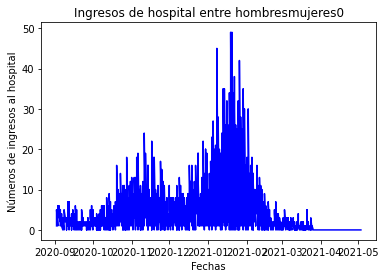

In [ ]:
#Ingresos en el hospital del sexo 0
x_01=dataset_sexo0['fecha']
y_01=dataset_sexo0['ingresoshosp']
plt.plot(x_01, y_01, color= 'b')
plt.title('Ingresos de hospital entre hombresmujeres0')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos al hospital')

Text(0, 0.5, 'Números de ingresos al hospital')

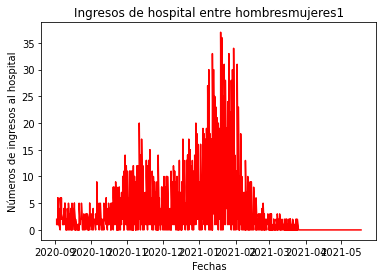

In [ ]:
#Ingresos en el hospital del sexo 1
x_11=dataset_sexo1['fecha']
y_11=dataset_sexo1['ingresoshosp']
plt.plot(x_11, y_11, color= 'r')
plt.title('Ingresos de hospital entre hombresmujeres1')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos al hospital')

Text(0, 0.5, 'Números de ingresos')

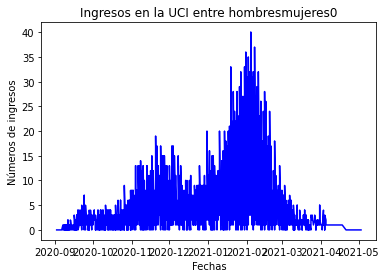

In [ ]:
#Ingresos en la uci sexo 0  
x_01=dataset_sexo0['fecha']
y_01=dataset_sexo0['ingresosuci']
plt.plot(x_01, y_01, color= 'b')
plt.title('Ingresos en la UCI entre hombresmujeres0')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos')

Text(0, 0.5, 'Números de ingresos')

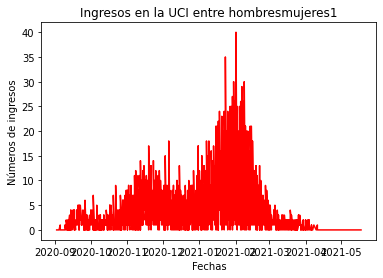

In [ ]:
#ingresos en la uci sexo 1
x_11=dataset_sexo1['fecha']
y_11=dataset_sexo1['ingresosuci']
plt.plot(x_11, y_11, color= 'r')
plt.title('Ingresos en la UCI entre hombresmujeres1')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos')

#Ingresoshosp en función de la edad

Text(0, 0.5, 'Números de ingresos')

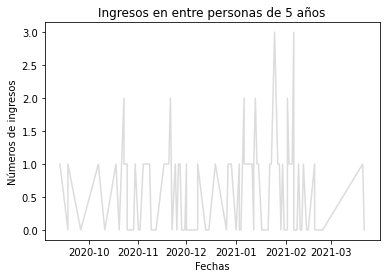

In [ ]:
#ingresos en el hospital según la edad (5)
x_5=dataset_edad5['fecha']
y_5=dataset_edad5['ingresoshosp']
plt.plot(x_5, y_5, color= 'gainsboro')
plt.title('Ingresos en entre personas de 5 años')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos')

Text(0, 0.5, 'Números de ingresos')

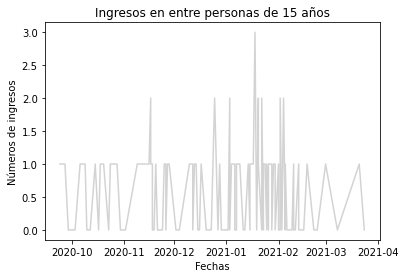

In [ ]:
#ingresos en el hospital según la edad (15)
x_15=dataset_edad15['fecha']
y_15=dataset_edad15['ingresoshosp']
plt.plot(x_15, y_15, color= 'lightgray')
plt.title('Ingresos en entre personas de 15 años')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos')

Text(0, 0.5, 'Números de ingresos')

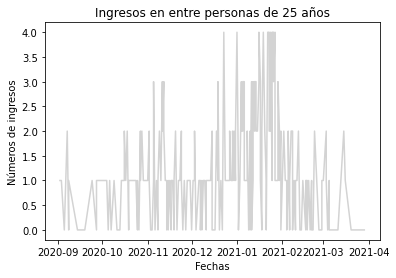

In [ ]:
#ingresos en el hospital según la edad (25)
x_25=dataset_edad25['fecha']
y_25=dataset_edad25['ingresoshosp']
plt.plot(x_25, y_25, color='lightgrey')
plt.title('Ingresos en entre personas de 25 años')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos')

Text(0, 0.5, 'Números de ingresos')

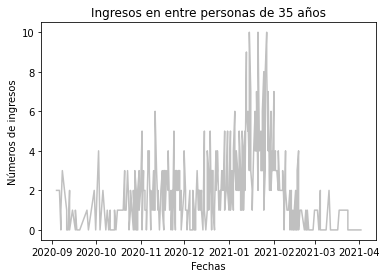

In [ ]:
#ingresos en el hospital según la edad (35)
x_35=dataset_edad35['fecha']
y_35=dataset_edad35['ingresoshosp']
plt.plot(x_35, y_35, color='silver')
plt.title('Ingresos en entre personas de 35 años')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos')

Text(0, 0.5, 'Números de ingresos')

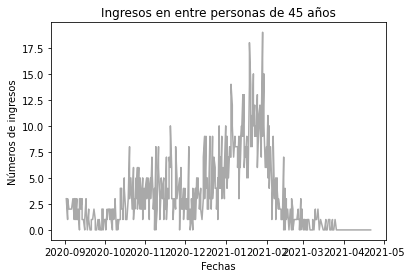

In [ ]:
#ingresos en el hospital según la edad (45)
x_45=dataset_edad45['fecha']
y_45=dataset_edad45['ingresoshosp']
plt.plot(x_45, y_45, color='darkgrey')
plt.title('Ingresos en entre personas de 45 años')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos')

Text(0, 0.5, 'Números de ingresos')

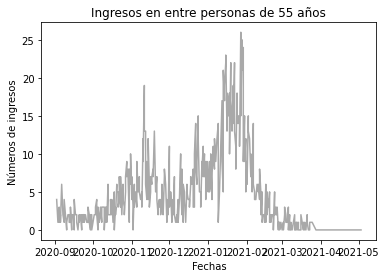

In [ ]:
#ingresos en el hospital según la edad (55)
x_55=dataset_edad55['fecha']
y_55=dataset_edad55['ingresoshosp']
plt.plot(x_55, y_55, color='darkgray')
plt.title('Ingresos en entre personas de 55 años')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos')

Text(0, 0.5, 'Números de ingresos')

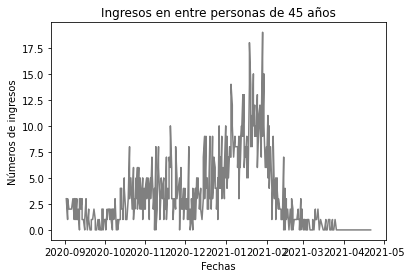

In [ ]:
#ingresos en el hospital según la edad (65)
x_45=dataset_edad45['fecha']
y_45=dataset_edad45['ingresoshosp']
plt.plot(x_45, y_45, color='gray')
plt.title('Ingresos en entre personas de 45 años')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos')

Text(0, 0.5, 'Números de ingresos')

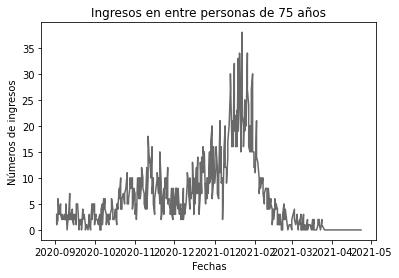

In [ ]:
#ingresos en el hospital según la edad (75)
x_75=dataset_edad75['fecha']
y_75=dataset_edad75['ingresoshosp']
plt.plot(x_75, y_75, color='dimgray')
plt.title('Ingresos en entre personas de 75 años')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos')

Text(0, 0.5, 'Números de ingresos')

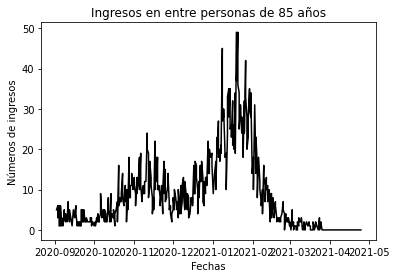

In [ ]:
#ingresos en el hospital según la edad (85)
x_85=dataset_edad85['fecha']
y_85=dataset_edad85['ingresoshosp']
plt.plot(x_85, y_85, color='k')
plt.title('Ingresos en entre personas de 85 años')
plt.xlabel('Fechas')
plt.ylabel('Números de ingresos')

#**CALCULAMOS LOS MODELOS**#

In [26]:
#Importamos todo lo que sea necesario para el modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from matplotlib import pyplot as plt

In [13]:
edades=dataset.groupby(['edad'])['ingresoshosp', 'ingresosuci', 'altashosp', 'altasuci','defunc','traslados'].sum()
sexo=dataset.groupby(['sexo'])['ingresoshosp','ingresosuci', 'altashosp', 'altasuci','defunc','traslados'].sum()
edadysexo=dataset.groupby(['edad', 'sexo'])['ingresoshosp','ingresosuci', 'altashosp', 'altasuci','defunc','traslados'].sum()
dataset_sexo0_1=dataset_sexo0.groupby(['edad'])['ingresoshosp','ingresosuci', 'altashosp', 'altasuci','defunc','traslados'].sum()
dataset_sexo1_1=dataset_sexo1.groupby(['edad'])['ingresoshosp','ingresosuci', 'altashosp', 'altasuci','defunc','traslados'].sum()
edades.to_csv('edades.csv')
sexo.to_csv('sexo.csv')
edadysexo.to_csv('edadysexo.csv')
dataset_sexo0_1.to_csv('dataset_sexo0_1.cvs')
dataset_sexo1_1.to_csv('dataset_sexo1_1.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: Futur

In [14]:
direccion8='/content/edades.csv'
direccion9='/content/sexo.csv'
direccion10='/content/edadysexo.csv'
direccion11='/content/dataset_sexo0_1.cvs'
direccion12='/content/dataset_sexo1_1.csv'
edades1=pd.read_csv(direccion8)
sexo1=pd.read_csv(direccion9)
edadysexo1=pd.read_csv(direccion10)
sexo0=pd.read_csv(direccion11)
sexo1=pd.read_csv(direccion12)

In [ ]:
sexo0

,edad,ingresoshosp,ingresosuci,altashosp,altasuci,defunc,traslados
0,5,33.0,33.0,33.0,33.0,0.0,0
1,15,46.0,46.0,46.0,46.0,0.0,0
2,25,150.0,150.0,150.0,150.0,0.0,0
3,35,329.0,329.0,329.0,329.0,5.0,0
4,45,826.0,826.0,826.0,826.0,23.0,0
5,55,1103.0,1103.0,1103.0,1103.0,64.0,0
6,65,1346.0,1346.0,1346.0,1346.0,162.0,0
7,75,1534.0,1534.0,1534.0,1534.0,357.0,0
8,85,2110.0,2110.0,2110.0,2110.0,996.0,0


# Calculamos en función de la edad los ingresoshosp

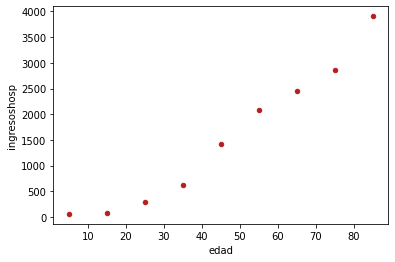

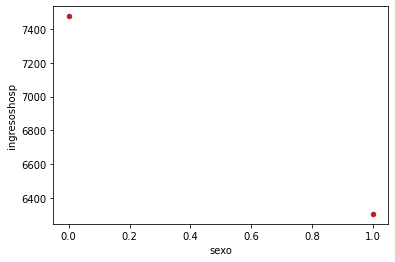

In [ ]:

edades1.plot(x='edad', y='ingresoshosp', c='firebrick', kind='scatter')
sexo1.plot(x='sexo',y='ingresoshosp', c='firebrick', kind='scatter')

In [ ]:
#Calculamos la correlación
corr_test = pearsonr(x = edades1['edad'], y = edades1['ingresoshosp'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

corr_test = pearsonr(x = sexo1['sexo'], y = sexo1['ingresoshosp'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.9770669528285026
P-value:  5.880715550813036e-06
Coeficiente de correlación de Pearson:  -1.0
P-value:  1.0


- EDAD. Tiene mucho sentido realizar un modelo ya que tiene un coeficiente de correlación de Pearson muy elevado, lo que quiere decir que tiene relación directa positiva
- SEXO. 

In [ ]:
#Scikit-learn
#Dividimos los datos entre train y test
X = edades1[['edad']]
y = edades1['ingresoshosp']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

#Creación del modelo
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

#Información del modelo
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

#Error del test del modelo
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

Intercept: [-466.10869565]
Coeficiente: [('edad', 43.53478260869567)]
Coeficiente de determinación R^2: 0.9414738988463135
[[3234.34782609]
 [ 622.26086957]]

El error (rmse) de test es: 529.2523715382176


In [ ]:
#Statsmodels
# División de los datos en train y test
X = edades1[['edad']]
y = edades1['ingresoshosp']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo utilizando matrices como en scikitlearn
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     114.2
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           0.000124
Time:                        11:16:00   Log-Likelihood:                -47.564
No. Observations:                   7   AIC:                             99.13
Df Residuals:                       5   BIC:                             99.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -466.1087    196.995     -2.366      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


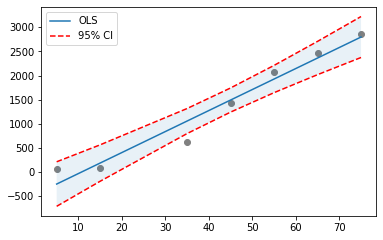

In [ ]:
#PREDICCIONES 

# Predicciones con intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)
# Predicciones con intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();


#Cálculos en función de la edad y el sexo los ingresoshosp

In [ ]:
#Importamos lo necesario para la regresión lineal múltiple
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [ ]:
#Dividimos los datos en train y test
X = edadysexo1[['edad', 'sexo']]
y = edadysexo1['ingresoshosp']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
#modelo con scikitlearn
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     81.58
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           2.53e-07
Time:                        18:41:18   Log-Likelihood:                -91.206
No. Observations:                  14   AIC:                             188.4
Df Residuals:                      11   BIC:                             190.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -260.3077    106.265     -2.450      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


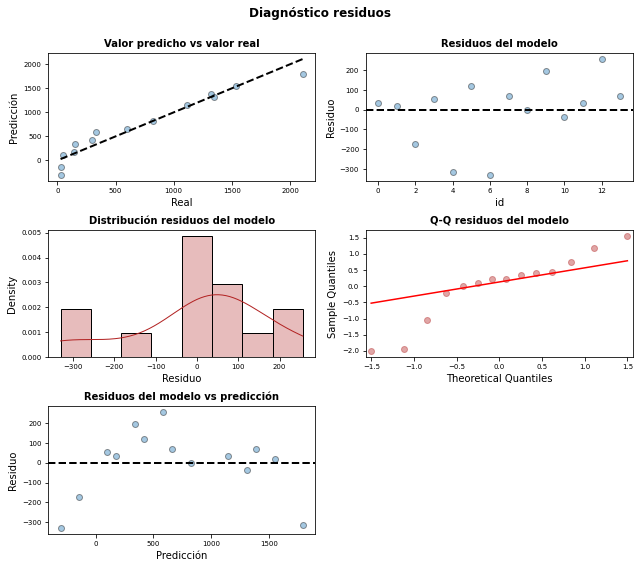

In [ ]:
#Errores de las predicciones de entrenamiento
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

# Gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");


Observamos que no sirve esta forma ya que los hombres y las mujeres están representadas en el eje x, hay que encontrar otra forma correcta de estimación

#Calculamos en función de la edad y el sexo (sexos separados) de los ingresos hosp

In [ ]:
sexo0

,edad,ingresoshosp,ingresosuci,altashosp,altasuci,defunc,traslados
0,5,33.0,33.0,33.0,33.0,0.0,0
1,15,46.0,46.0,46.0,46.0,0.0,0
2,25,150.0,150.0,150.0,150.0,0.0,0
3,35,329.0,329.0,329.0,329.0,5.0,0
4,45,826.0,826.0,826.0,826.0,23.0,0
5,55,1103.0,1103.0,1103.0,1103.0,64.0,0
6,65,1346.0,1346.0,1346.0,1346.0,162.0,0
7,75,1534.0,1534.0,1534.0,1534.0,357.0,0
8,85,2110.0,2110.0,2110.0,2110.0,996.0,0


Coeficiente de correlación de Pearson:  0.9766990238325312
P-value:  6.2153666681636786e-06
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     110.7
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           0.000134
Time:                        17:11:24   Log-Likelihood:                -43.377
No. Observations:                   7   AIC:                             90.75
Df Residuals:                       5   BIC:                             90.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


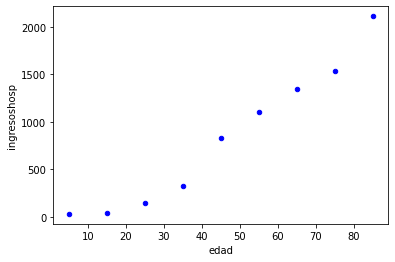

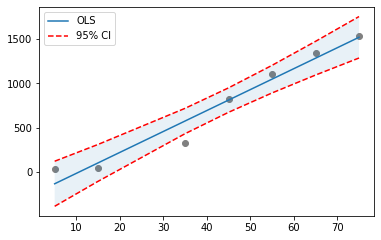

In [22]:
sexo0.plot(x='edad', y='ingresoshosp', c='blue', kind='scatter')

#Calculamos la correlación
corr_test = pearsonr(x = sexo0['edad'], y = sexo0['ingresoshosp'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])


#Statsmodels
# División de los datos en train y test
X = sexo0[['edad']]
y = sexo0['ingresoshosp']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo utilizando matrices como en scikitlearn
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

#PREDICCIONES 

# Predicciones con intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)
# Predicciones con intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept: [ 778.21095783  533.0663119   118.35283016  -75.76012214 -265.49405183
 -452.14347997 -636.23244596]
Coeficiente: [('edad', -41.3867383193467)]
Accuracy de entrenamiento: 0.7777777777777778


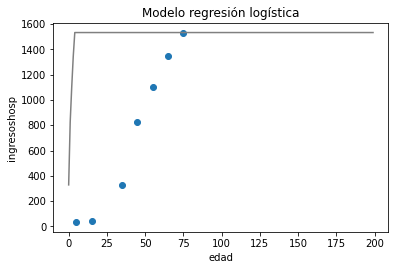

In [48]:
#Probamos con una función logarítmica
X = sexo0[['edad']]
y = sexo0['ingresoshosp']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
modelo = LogisticRegression(penalty='none')
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X, y))

#Predicciones
grid_X = np.linspace(
            start = min(sexo0.ingresoshosp),
            stop  = max(sexo0.ingresoshosp),
            num   = 200
         ).reshape(-1,1)

#grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict( grid_X)

#Gráficos
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.scatter(X_train, y_train)
ax.plot(predicciones, color = "gray")
ax.set_title("Modelo regresión logística")
ax.set_ylabel("ingresoshosp")
ax.set_xlabel("edad");
#DESASTRE, NOS QUEDAMOS CON EL OTRO MODELOOOO!!!

Coeficiente de correlación de Pearson:  0.9763353026798189
P-value:  6.559274581243902e-06
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     107.1
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           0.000145
Time:                        16:29:53   Log-Likelihood:                -42.339
No. Observations:                   7   AIC:                             88.68
Df Residuals:                       5   BIC:                             88.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


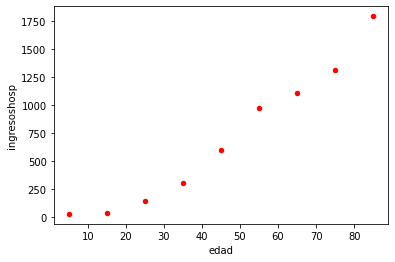

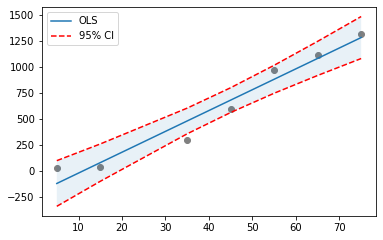

In [21]:
sexo1.plot(x='edad', y='ingresoshosp', c='r', kind='scatter')

#Calculamos la correlación
corr_test = pearsonr(x = sexo1['edad'], y = sexo1['ingresoshosp'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])


#Statsmodels
# División de los datos en train y test
X = sexo1[['edad']]
y = sexo1['ingresoshosp']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo utilizando matrices como en scikitlearn
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

#PREDICCIONES 

# Predicciones con intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)
# Predicciones con intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();
